In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e7/sample_submission.csv
/kaggle/input/playground-series-s5e7/train.csv
/kaggle/input/playground-series-s5e7/test.csv


## Data Loading

In [2]:
train_data = pd.read_csv("/kaggle/input/playground-series-s5e7/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s5e7/test.csv")

## Train data preprocessing

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
train_data

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


In [6]:
numerical_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
for col in numerical_cols:
    median_val = train_data[col].median()
    train_data[col] = train_data[col].fillna(median_val)

categorical_cols_to_impute = ['Stage_fear', 'Drained_after_socializing']
for col in categorical_cols_to_impute:
    mode_val = train_data[col].mode()[0]
    train_data[col] = train_data[col].fillna(mode_val)

In [7]:
print(train_data.isnull().sum())

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


In [8]:
print(f"Unique values for Stage_fear: {train_data['Stage_fear'].unique()}")
print(f"Unique values for Drained_after_socializing: {train_data['Drained_after_socializing'].unique()}")

Unique values for Stage_fear: ['No' 'Yes']
Unique values for Drained_after_socializing: ['No' 'Yes']


In [9]:
le = LabelEncoder()
train_data['Stage_fear'] = le.fit_transform(train_data['Stage_fear'])
train_data['Drained_after_socializing'] = le.fit_transform(train_data['Drained_after_socializing'])

In [10]:
train_data['Personality']

0        Extrovert
1        Extrovert
2        Introvert
3        Extrovert
4        Extrovert
           ...    
18519    Extrovert
18520    Extrovert
18521    Introvert
18522    Introvert
18523    Extrovert
Name: Personality, Length: 18524, dtype: object

In [11]:
personality_le = LabelEncoder()
train_data['Personality'] = personality_le.fit_transform(train_data['Personality'])

In [12]:

print(f"\n'Personality' (target) encoded. Mapping: {list(personality_le.classes_)} -> {list(range(len(personality_le.classes_)))}")


'Personality' (target) encoded. Mapping: ['Extrovert', 'Introvert'] -> [0, 1]


In [13]:
train_data = train_data.drop('id', axis=1)

##  CatBoost Model Implementation

In [14]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
X = train_data.drop('Personality', axis=1)
y = train_data['Personality'] 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y ensures that the proportion of Introvert/Extrovert is the same in train and test sets.
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 14819 samples
Testing set size: 3705 samples


In [17]:
model = CatBoostClassifier(
    iterations=1000,           # Number of boosting iterations (trees)
    learning_rate=0.05,        # Step size shrinkage to prevent overfitting
    depth=6,                   # Depth of the tree (max depth is 16)
    loss_function='Logloss',   # Loss function for binary classification
    eval_metric='Accuracy',    # Metric to monitor during training
    random_seed=42,            # For reproducibility
    verbose=0,                 # Suppress output during training
    early_stopping_rounds=50   # Stop if validation metric doesn't improve for 50 iterations
)

## Fit the model

In [18]:
model.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          verbose=False) 

In [19]:
print(f"Best iteration: {model.get_best_iteration()} out of {model.get_param('iterations')} iterations.")

Best iteration: 7 out of 1000 iterations.


## Making predictions

In [20]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

## Model Evaluation

In [21]:
target_names = personality_le.inverse_transform([0, 1])

In [22]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

Accuracy: 0.9719
Precision: 0.9434
Recall: 0.9492
F1-Score: 0.9463
ROC-AUC Score: 0.9727


In [23]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


Classification Report:
              precision    recall  f1-score   support

   Extrovert       0.98      0.98      0.98      2740
   Introvert       0.94      0.95      0.95       965

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



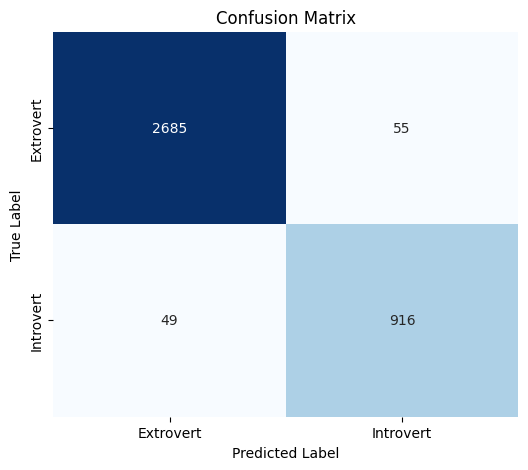

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Feature Importance


Feature Importances:
                     Feature  Importance
4  Drained_after_socializing   46.883358
1                 Stage_fear   40.425402
0           Time_spent_Alone    3.696181
2    Social_event_attendance    3.496015
3              Going_outside    2.397310
6             Post_frequency    2.377728
5        Friends_circle_size    0.724005


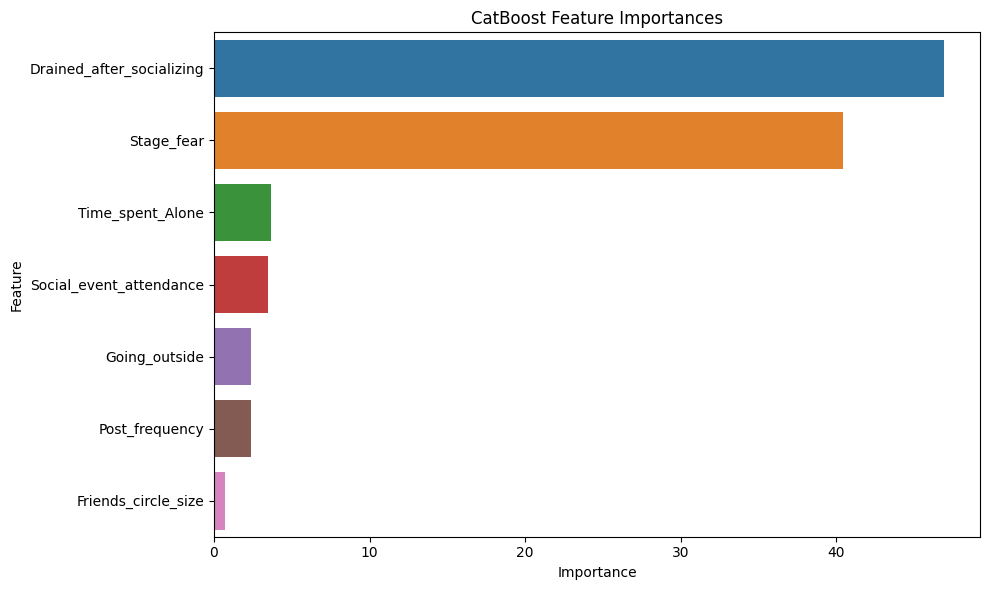

In [25]:
feature_importances = model.get_feature_importance(Pool(X_train, y_train))
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('CatBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Test data preprocessing

In [26]:
test_data

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0
...,...,...,...,...,...,...,...,...
6170,24694,3.0,No,5.0,5.0,No,9.0,6.0
6171,24695,8.0,Yes,2.0,1.0,Yes,0.0,0.0
6172,24696,2.0,No,4.0,3.0,No,9.0,7.0
6173,24697,3.0,No,4.0,4.0,No,11.0,9.0


In [27]:
numerical_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
for col in numerical_cols:
    median_val = test_data[col].median()
    test_data[col] = test_data[col].fillna(median_val)

categorical_cols_to_impute = ['Stage_fear', 'Drained_after_socializing']
for col in categorical_cols_to_impute:
    mode_val = test_data[col].mode()[0]
    test_data[col] = test_data[col].fillna(mode_val)

In [28]:
print(test_data.isnull().sum())

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
dtype: int64


In [29]:
print(f"Unique values for Stage_fear: {test_data['Stage_fear'].unique()}")
print(f"Unique values for Drained_after_socializing: {test_data['Drained_after_socializing'].unique()}")

Unique values for Stage_fear: ['No' 'Yes']
Unique values for Drained_after_socializing: ['No' 'Yes']


In [30]:
le = LabelEncoder()
test_data['Stage_fear'] = le.fit_transform(test_data['Stage_fear'])
test_data['Drained_after_socializing'] = le.fit_transform(test_data['Drained_after_socializing'])

In [31]:
test_data

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,0,7.0,4.0,0,6.0,5.0
1,18525,2.0,1,0.0,0.0,1,5.0,1.0
2,18526,3.0,0,5.0,6.0,0,15.0,9.0
3,18527,3.0,0,4.0,4.0,0,5.0,6.0
4,18528,9.0,1,1.0,2.0,1,1.0,1.0
...,...,...,...,...,...,...,...,...
6170,24694,3.0,0,5.0,5.0,0,9.0,6.0
6171,24695,8.0,1,2.0,1.0,1,0.0,0.0
6172,24696,2.0,0,4.0,3.0,0,9.0,7.0
6173,24697,3.0,0,4.0,4.0,0,11.0,9.0


In [32]:
test_features = test_data.drop(columns='id', axis = 1)

## Predictions

In [33]:
pred = model.predict(test_features)
pred_proba = model.predict_proba(test_features)[:, 1]

In [34]:
pred

array([0, 1, 0, ..., 0, 0, 1])

In [35]:
pred_proba

array([0.2164007 , 0.71920077, 0.22958673, ..., 0.21803937, 0.21803937,
       0.72494274])

In [36]:
target_names = personality_le.inverse_transform(pred)

In [37]:
submission = pd.DataFrame({
    'id': test_data['id'],
    'Personality': target_names
})
submission.to_csv('/kaggle/working/submission.csv', index=False)

print("Prediction file has been created")

Prediction file has been created
